In [96]:
import re
from gensim.models import Word2Vec 
from gensim.utils import tokenize

with open("Harry_Potter_Camara_Secreta-br.txt", encoding="utf-8") as f1:
    harry_text1 = f1.read()

with open("Harry_Potter_e_A_Pedra_Filosofal.txt", encoding="utf-8") as f2:
    harry_text2 = f2.read()

linhas1 = harry_text1.split("\n")
linhas2 = harry_text2.split("\n")

tokens1 = []
for linha in linhas1:
    #linha = re.sub(r'[-!?.,]',"", linha)
    linha = list(tokenize(linha, lower=True))
    tokens1.append(linha)

tokens2 = []
for linha in linhas2:
    #linha = re.sub(r'[-!?.,]',"", linha)
    linha = list(tokenize(linha, lower=True))
    tokens2.append(linha)

Opção 1

In [97]:
model1 = Word2Vec(tokens1, vector_size= 300, window= 5, min_count= 1, epochs= 20)
model2 = Word2Vec(tokens2, vector_size= 300, window= 5, min_count= 1, epochs= 20)

Similarity

In [98]:
print(model1.wv.most_similar("harry"))
print(model2.wv.most_similar("harry"))

[('rony', 0.9409414529800415), ('mione', 0.9279162883758545), ('draco', 0.9192952513694763), ('alerta', 0.9168880581855774), ('ganhamos', 0.9082030057907104), ('inclinando', 0.9078159928321838), ('hermione', 0.902575671672821), ('sairmos', 0.9000473022460938), ('supetão', 0.8951720595359802), ('lembrem', 0.8892934918403625)]
[('hermione', 0.9535937905311584), ('rony', 0.952610969543457), ('neville', 0.9446286559104919), ('sonolento', 0.9421613216400146), ('hagrid', 0.9338136315345764), ('bondade', 0.9289551973342896), ('punha', 0.9258477091789246), ('irritação', 0.9248499274253845), ('jogue', 0.9221373796463013), ('coçando', 0.9213188290596008)]


In [99]:
print(model1.wv.similarity("harry","rony"))
print(model2.wv.similarity("harry","rony"))

0.94094145
0.95261097


In [100]:
pairs = [
    ('harry', 'rony'),   
    ('dumbledore', 'hogwarts'),
    ('elfo', 'magia'),
    ('harry', 'dobby'),
    ('diário', 'tom')
]
for w1, w2 in pairs:
    print('%s \t %s \t% .2f' % (w1, w2, model1.wv.similarity(w1, w2)))

harry 	 rony 	 0.94
dumbledore 	 hogwarts 	 0.73
elfo 	 magia 	 0.78
harry 	 dobby 	 0.68
diário 	 tom 	 0.85


In [101]:
pairs = [
    ('harry', 'rony'),   
    ('dumbledore', 'hogwarts'),
    ('matar', 'magia'),
    ('harry', 'cicatriz'),
    ('pedra', 'snape')
]
for w1, w2 in pairs:
    print('%s \t %s \t% .2f' % (w1, w2, model2.wv.similarity(w1, w2)))

harry 	 rony 	 0.95
dumbledore 	 hogwarts 	 0.90
matar 	 magia 	 0.71
harry 	 cicatriz 	 0.84
pedra 	 snape 	 0.94


Analogies

In [102]:
result1 = model1.wv.most_similar(positive=['harry', 'dobby'], negative=['rony'])
print(result1[0])
result2 = model2.wv.most_similar(positive=['harry', 'filosofal'], negative=['rony'])
print(result2[0])

('toma', 0.8854320049285889)
('aparência', 0.9612008333206177)


In [103]:
def analogy (x1, y1, x2):
    result1 = model1.wv.most_similar(positive=[x2, y1], negative=[x1])
    result2 = model2.wv.most_similar(positive=[x2, y1], negative=[x1])
    return result1[0][0], result2[0][0]

In [104]:
analogy('harry', 'hermione', 'rony')

('estenderam', 'rispidez')

In [105]:
analogy('magia', 'varinha', 'cicatriz')

('tesoura', 'cara')

Visualisation

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model1, model2, words_model1=None, words_model2=None):
    if words_model1 is None:
        words_model1 = []
    if words_model2 is None:
        words_model2 = []
    
    plt.figure(figsize=(12,6))
    
    # Plotagem para o modelo 1
    if words_model1:
        word_vectors_model1 = np.array([model1[w] for w in words_model1])
        twodim_model1 = PCA().fit_transform(word_vectors_model1)[:,:2]
        plt.subplot(1, 2, 1)
        plt.scatter(twodim_model1[:,0], twodim_model1[:,1], edgecolors='k', c='r')
        for word, (x,y) in zip(words_model1, twodim_model1):
            plt.text(x+0.05, y+0.05, word)
        plt.title('Harry_Potter_Camara_Secreta-br')
    
    # Plotagem para o modelo 2
    if words_model2:
        word_vectors_model2 = np.array([model2[w] for w in words_model2])
        twodim_model2 = PCA().fit_transform(word_vectors_model2)[:,:2]
        plt.subplot(1, 2, 2)
        plt.scatter(twodim_model2[:,0], twodim_model2[:,1], edgecolors='k', c='b')
        for word, (x,y) in zip(words_model2, twodim_model2):
            plt.text(x+0.05, y+0.05, word)
        plt.title('Harry_Potter_e_A_Pedra_Filosofal')

    plt.tight_layout()
    plt.show()

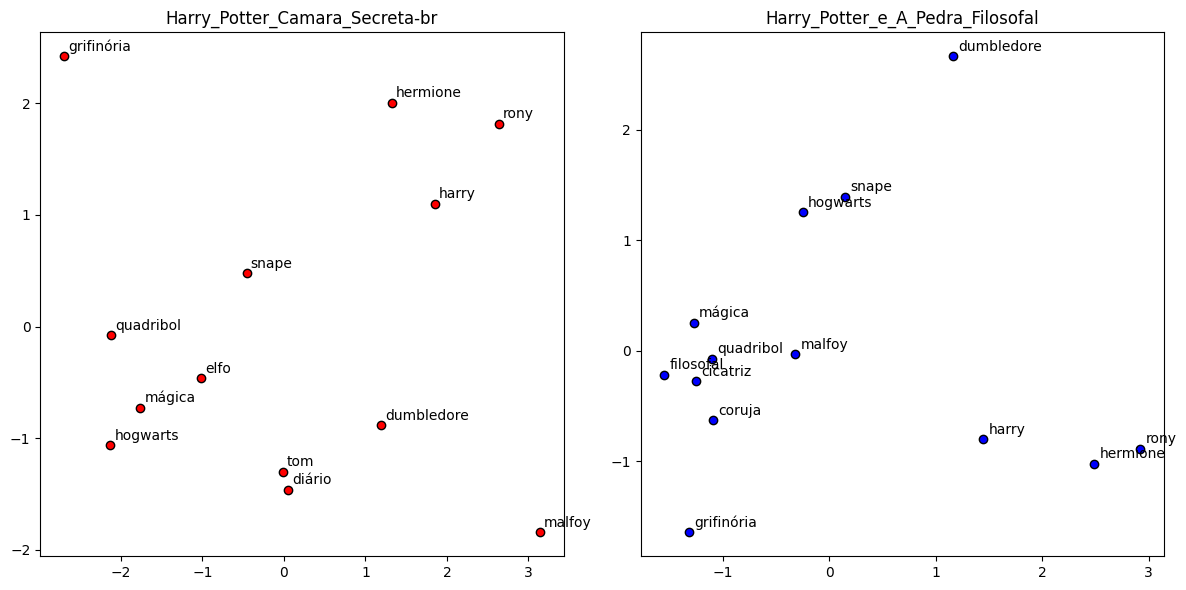

In [107]:
words_model1 =  ['harry', 'rony', 'hermione', 'snape', 'dumbledore', 'elfo', 'hogwarts',
                         'malfoy', 'diário', 'tom', 'grifinória', 'mágica', 'quadribol']
words_model2 =  ['harry', 'rony', 'hermione', 'snape', 'dumbledore', 'filosofal', 'hogwarts',
                         'malfoy', 'cicatriz', 'coruja', 'grifinória', 'mágica', 'quadribol']
display_pca_scatterplot(model1.wv, model2.wv, words_model1, words_model2)

Opção 2

In [108]:
model1 = Word2Vec(tokens1, vector_size=300, window=10, min_count=1, epochs=50)
model2 = Word2Vec(tokens2, vector_size=300, window=10, min_count=1, epochs=50)

Similaridade

In [109]:
print(model1.wv.most_similar("harry"))
print(model2.wv.most_similar("harry"))

[('ele', 0.5515199303627014), ('manhoso', 0.41230159997940063), ('garoto', 0.4044658839702606), ('ossudo', 0.39316439628601074), ('anão', 0.38836947083473206), ('portão', 0.38824373483657837), ('pulso', 0.3842184543609619), ('dobby', 0.38143080472946167), ('subir', 0.37869420647621155), ('escapar', 0.3766132891178131)]
[('rony', 0.49613574147224426), ('neville', 0.4773460030555725), ('chegada', 0.46827423572540283), ('desvencilhar', 0.4632273018360138), ('achatar', 0.4597060978412628), ('atenção', 0.45275405049324036), ('excitado', 0.43842580914497375), ('interessado', 0.4296451807022095), ('cartão', 0.42695537209510803), ('dormir', 0.4237837791442871)]


In [110]:
print(model1.wv.similarity("harry","rony"))
print(model2.wv.similarity("harry","rony"))

0.28824028
0.49613577


In [111]:
pairs = [
    ('harry', 'rony'),   
    ('dumbledore', 'hogwarts'),
    ('elfo', 'magia'),
    ('harry', 'dobby'),
    ('diário', 'tom')
]
for w1, w2 in pairs:
    print('%s \t %s \t% .2f' % (w1, w2, model1.wv.similarity(w1, w2)))

harry 	 rony 	 0.29
dumbledore 	 hogwarts 	 0.08
elfo 	 magia 	-0.17
harry 	 dobby 	 0.38
diário 	 tom 	 0.31


In [112]:
pairs = [
    ('harry', 'rony'),   
    ('dumbledore', 'hogwarts'),
    ('matar', 'magia'),
    ('harry', 'cicatriz'),
    ('pedra', 'snape')
]
for w1, w2 in pairs:
    print('%s \t %s \t% .2f' % (w1, w2, model2.wv.similarity(w1, w2)))

harry 	 rony 	 0.50
dumbledore 	 hogwarts 	 0.37
matar 	 magia 	 0.11
harry 	 cicatriz 	 0.22
pedra 	 snape 	 0.44


Analogies 

In [113]:
result1 = model1.wv.most_similar(positive=['harry', 'dobby'], negative=['rony'])
print(result1[0])
result2 = model2.wv.most_similar(positive=['harry', 'filosofal'], negative=['rony'])
print(result2[0])

('senhor', 0.5684239864349365)
('pedra', 0.5711806416511536)


In [114]:
def analogy (x1, y1, x2):
    result1 = model1.wv.most_similar(positive=[x2, y1], negative=[x1])
    result2 = model2.wv.most_similar(positive=[x2, y1], negative=[x1])
    return result1[0][0], result2[0][0]

In [115]:
analogy('harry', 'hermione', 'rony')

('tomarmos', 'enganou')

In [116]:
analogy('magia', 'varinha', 'cicatriz')

('mão', 'mão')

Visualition

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def display_pca_scatterplot(model1, model2, words_model1=None, words_model2=None):
    if words_model1 is None:
        words_model1 = []
    if words_model2 is None:
        words_model2 = []
    
    plt.figure(figsize=(12,6))
    
    # Plotagem para o modelo 1
    if words_model1:
        word_vectors_model1 = np.array([model1[w] for w in words_model1])
        twodim_model1 = PCA().fit_transform(word_vectors_model1)[:,:2]
        plt.subplot(1, 2, 1)
        plt.scatter(twodim_model1[:,0], twodim_model1[:,1], edgecolors='k', c='r')
        for word, (x,y) in zip(words_model1, twodim_model1):
            plt.text(x+0.05, y+0.05, word)
        plt.title('Harry_Potter_Camara_Secreta-br')
    
    # Plotagem para o modelo 2
    if words_model2:
        word_vectors_model2 = np.array([model2[w] for w in words_model2])
        twodim_model2 = PCA().fit_transform(word_vectors_model2)[:,:2]
        plt.subplot(1, 2, 2)
        plt.scatter(twodim_model2[:,0], twodim_model2[:,1], edgecolors='k', c='b')
        for word, (x,y) in zip(words_model2, twodim_model2):
            plt.text(x+0.05, y+0.05, word)
        plt.title('Harry_Potter_e_A_Pedra_Filosofal')

    plt.tight_layout()
    plt.show()

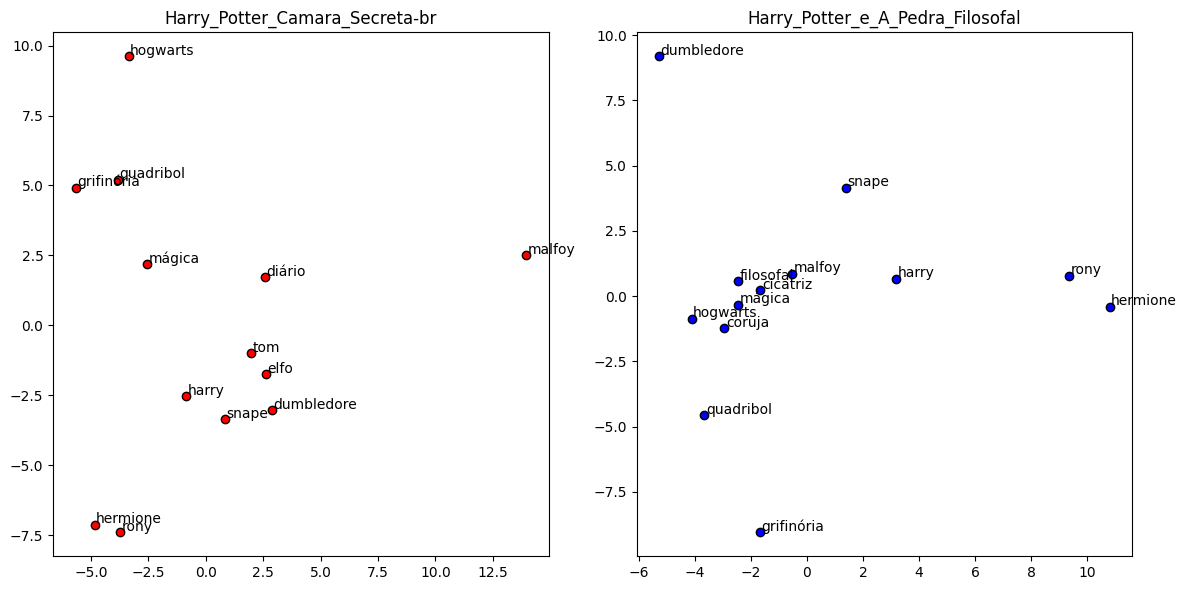

In [118]:
words_model1 =  ['harry', 'rony', 'hermione', 'snape', 'dumbledore', 'elfo', 'hogwarts',
                         'malfoy', 'diário', 'tom', 'grifinória', 'mágica', 'quadribol']
words_model2 =  ['harry', 'rony', 'hermione', 'snape', 'dumbledore', 'filosofal', 'hogwarts',
                         'malfoy', 'cicatriz', 'coruja', 'grifinória', 'mágica', 'quadribol']
display_pca_scatterplot(model1.wv, model2.wv, words_model1, words_model2)